In [4]:
%pylab inline
import glob
import numpy as np
import sys
import seaborn as sns
from scipy import stats
sys.path.append("/storage/BonnieH/selection_project/helper_functions")
from Joint_method_functions import *
import matplotlib
from matplotlib import pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
PLOTDIR = '/storage/BonnieH/selection_project/joint_method/figures/validation_one_opt/plot_together/'

Populating the interactive namespace from numpy and matplotlib


/storage/BonnieH/anaconda/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [5]:
# PLot CDF of per-locus posterior estimates of s 

def main():
    print('Running main')
    
    fig_num = 0
    pers = [2,3,4] 
    
    # Alternate color list
    #color_list = ['C0','C1','C2','C3','C4','C5','C6','C7','C8','C9','b','k']
    color_list = ['red','orange','gold','lawngreen','forestgreen','turquoise','blue','purple','brown','slategray']
    
    # Dictionary of motifs to plot
    motif_dic = {}
    motif_dic[2] = ['AC','AG','AT']
    motif_dic[3] = ['ACC','AGG','AGC','CCG','AAG','AAC','ATC','AAT','ACT']
    motif_dic[4] = ['AAGG','AAAT','ATCC','AATC','AAAC','AATG','ACAT','AGAT','AAAG']
    
    #clrs = sns.color_palette('husl', n_colors=10)
    color_dic_motif={}
    for per in pers:
        i = -1
    
        for motif in motif_dic[per]:
            i = i + 1
            color_dic_motif[motif] = color_list[i]
            
    # Plot motifs (sep graph for each opt allele)
    for per in pers:
        print('Period %d'%(per))
        motifs = motif_dic[per]
        base_plot = ''
        cum_dic_per_locus = {}
        bins_list = [0]
        exponents = [10**-5, 10**-4, 10**-3, 10**-2]
        for j in exponents:
            for i in np.arange(1,10,0.1):
                bins_list.append(i*j)

        bins_list.append(0.1)
        bins_list.append(1)
        bins_list = list(np.arange(0,1.01,10**-5))
        
        for motif in motifs:
       
            inFile = '/storage/BonnieH/selection_project/per_locus/SISTR_results/0.005_3_0.3_yny5_eurodem_prior2_all_per_0810.txt'
            allele_freqs_file = open(inFile, 'r')

            header = allele_freqs_file.readline().strip()
            s_per_locus = []
            for line in allele_freqs_file:
                info = line.strip().split('\t')

                mot = info[6]
                opt = int(info[5])
                total = int(info[3])
                s_ABC = info[17]
                if mot == motif and total > 5214 and opt > 6:
                    if s_ABC != 'N/A':
                        s_ABC = float(s_ABC)
                        s_per_locus.append(s_ABC)
            
            allele_freqs_file.close()
            
            vals, base = np.histogram(s_per_locus, bins=bins_list)# [0,10**-5,10**-4,10**-3,10**-2,10**-1,1]
            #print(stats.mode(s_per_locus))
            #print(max(set(s_per_locus), key=s_per_locus.count))
            cumul = list(np.cumsum(vals))
            maximum = max(cumul)
            cumul_scaled = []
            for elem in cumul:
                elem = elem/maximum
                elem = round(elem,7)
                cumul_scaled.append(elem)

            cum_dic_per_locus[(motif)] = cumul_scaled
            base_plot = base
          
        # Plot CDF
        color_num = -1
        fig_num = fig_num + 1
        plt.figure(fig_num)
        for elem in cum_dic_per_locus:
                
            color_num = color_num + 1
            #plt.plot(base_plot[:-1], cum_dic[elem], label = elem[0] + ' opt ' + str(elem[1]) + ' (' + str(elem[2]) + ' loci)', color=color_dic_motif[elem[0]], linewidth = 2) #color_dic[elem[0]] color_list[color_num]
            plt.plot(base_plot[:-1], cum_dic_per_locus[elem], label = elem, color=color_dic_motif[elem], linewidth = 3) #color_dic[elem[0]] color_list[color_num]
            
        plt.xlim(10**-5, 0.1)
        plt.xscale('log')
        #plt.title('Distribution of s values: joint method\n' + 'Per ' + str(per) + ' Opt allele ' + str(elem[1]))
        plt.xlabel('s')
        plt.title('Period %d'%(per))
        plt.legend()

        #yticks([0, 2000, 4000, 6000, 8000, 10000], ['0', '0.2', '0.4', '0.6', '0.8', '1.0'])
        plt.ylabel('Cumulative Frequency')
        plt.show()
    print('Done')

Running main
Period 2


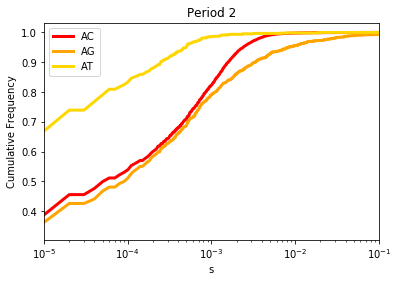

Period 3


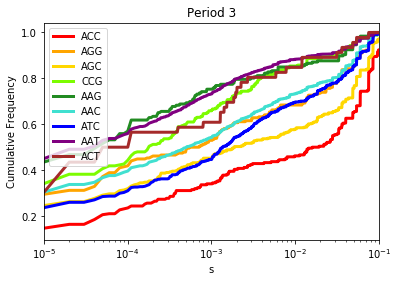

Period 4


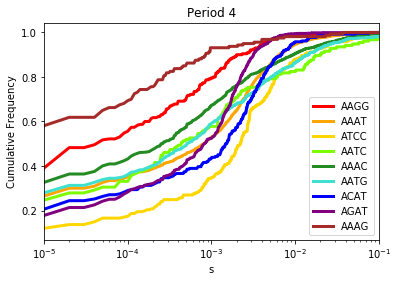

Done
CPU times: user 1min 52s, sys: 8.84 s, total: 2min 1s
Wall time: 27.5 s


In [6]:
%%time
if __name__ == '__main__':
    main()